# Efficient Frontier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
import edhec_risk_kit as erk

In [3]:
df = pd.read_csv('data/ind30_m_ew_rets.csv', header=0, index_col=0, parse_dates=True)/100

In [4]:
df.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
192607,0.0086,-0.0536,0.0167,0.0231,0.2628,0.0245,-0.0068,0.0245,0.0101,0.0044,...,0.0131,0.0776,0.0313,0.0129,-0.0089,-0.2023,0.0178,0.0169,0.0044,0.0261
192608,0.0370,0.1925,0.0501,0.0253,0.2118,-0.0286,0.0479,0.0611,0.0302,0.0431,...,0.0108,0.0420,0.0120,0.0400,0.0513,0.0942,-0.0045,-0.0090,0.0884,0.0348
192609,0.0138,0.0563,0.0310,0.0413,-0.0204,0.0176,-0.0616,0.0080,0.0240,-0.0409,...,0.0022,-0.0628,-0.0089,-0.0664,-0.0028,0.0032,-0.0087,-0.0014,-0.0255,-0.0018
192610,-0.0470,-0.0608,-0.0163,-0.0576,0.0833,-0.0298,-0.0112,0.0013,-0.0877,0.0192,...,-0.0099,-0.0410,-0.0588,-0.0490,-0.0233,-0.0621,-0.0333,-0.0205,-0.0440,-0.0639
192611,0.0674,0.1129,0.0958,0.0028,-0.0598,0.0165,0.0085,0.0720,0.0534,0.0454,...,0.0148,-0.0362,0.0165,0.0260,0.0042,-0.0026,0.0134,0.0192,-0.0027,-0.0041


In [5]:
df.index = pd.to_datetime(df.index, format = '%Y%M').to_period('M')

In [6]:
df.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-01,0.0086,-0.0536,0.0167,0.0231,0.2628,0.0245,-0.0068,0.0245,0.0101,0.0044,...,0.0131,0.0776,0.0313,0.0129,-0.0089,-0.2023,0.0178,0.0169,0.0044,0.0261
1926-01,0.0370,0.1925,0.0501,0.0253,0.2118,-0.0286,0.0479,0.0611,0.0302,0.0431,...,0.0108,0.0420,0.0120,0.0400,0.0513,0.0942,-0.0045,-0.0090,0.0884,0.0348
1926-01,0.0138,0.0563,0.0310,0.0413,-0.0204,0.0176,-0.0616,0.0080,0.0240,-0.0409,...,0.0022,-0.0628,-0.0089,-0.0664,-0.0028,0.0032,-0.0087,-0.0014,-0.0255,-0.0018
1926-01,-0.0470,-0.0608,-0.0163,-0.0576,0.0833,-0.0298,-0.0112,0.0013,-0.0877,0.0192,...,-0.0099,-0.0410,-0.0588,-0.0490,-0.0233,-0.0621,-0.0333,-0.0205,-0.0440,-0.0639
1926-01,0.0674,0.1129,0.0958,0.0028,-0.0598,0.0165,0.0085,0.0720,0.0534,0.0454,...,0.0148,-0.0362,0.0165,0.0260,0.0042,-0.0026,0.0134,0.0192,-0.0027,-0.0041


In [7]:
df.columns

Index(['Food ', 'Beer ', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth ',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin  ', 'Other'],
      dtype='object')

In [8]:
df.columns = df.columns.str.strip() # strip whitespace from column names

In [9]:
df.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [10]:
df = erk.get_ind_returns()
df.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [11]:
df.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

<Axes: >

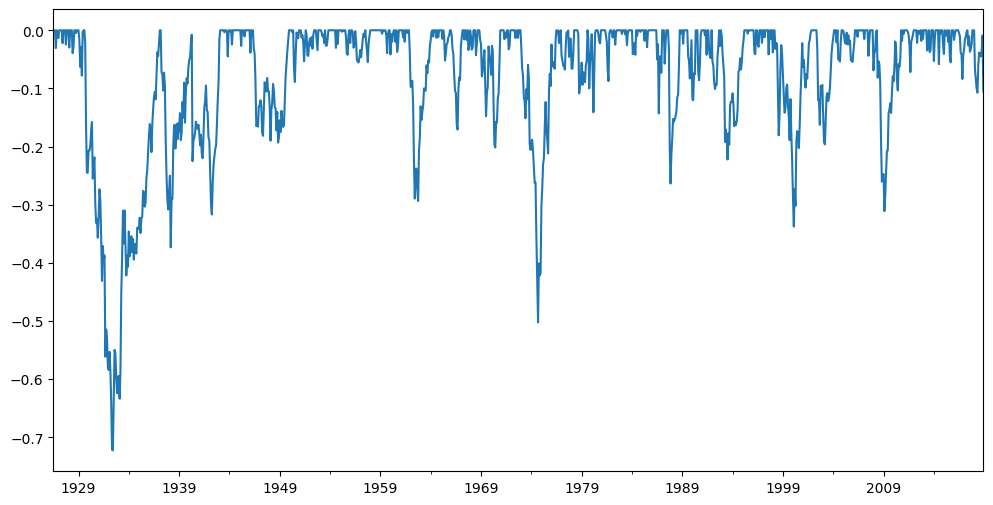

In [12]:
erk.drawdown(df['Food'])["Drawdown"].plot.line(figsize = (12,6), style = '-')

In [13]:
erk.var_gaussian(df[['Food', 'Beer', 'Smoke', 'Coal', 'Fin']], modified = True).sort_values() # Cornish-Fisher modification


Beer     0.033881
Coal     0.047359
Food     0.061207
Fin      0.075199
Smoke    0.080292
dtype: float64

In [14]:
erk.var_gaussian(df, modified = True).sort_values().tail()

Carry    0.094527
Meals    0.098403
BusEq    0.099377
Games    0.100701
Mines    0.102782
dtype: float64

In [15]:
erk.var_gaussian(df, modified = True).sort_values().head()

Beer     0.033881
Coal     0.047359
Food     0.061207
Telcm    0.064719
Hshld    0.064886
dtype: float64

<Axes: >

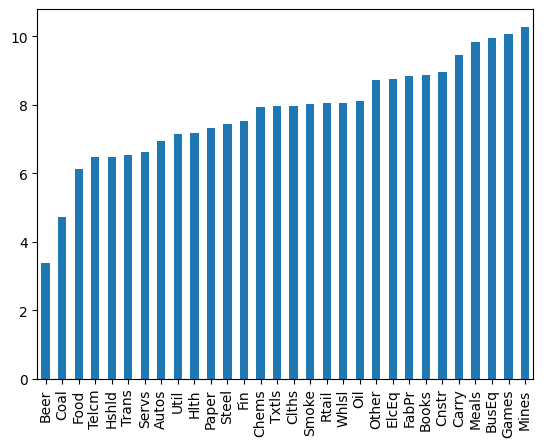

In [16]:
(erk.var_gaussian(df, modified = True).sort_values()*100).plot.bar()

<Axes: title={'center': 'Industry Sharpe Ratios 1926-2018'}>

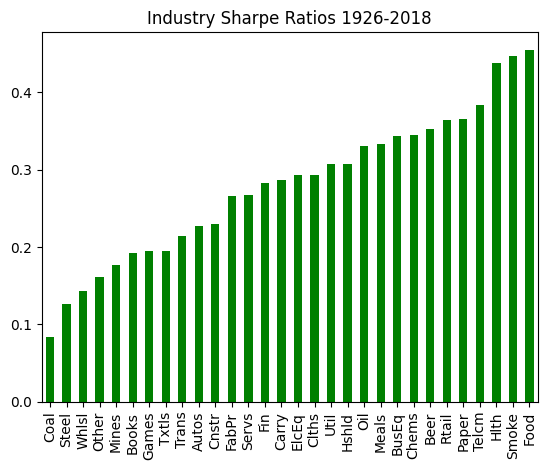

In [17]:
erk.sharpe_ratio(df, 0.03, 12).sort_values().plot.bar(title = 'Industry Sharpe Ratios 1926-2018', color = 'green') # type: ignore

<Axes: title={'center': 'Industry Sharpe Ratios 1926-2018'}>

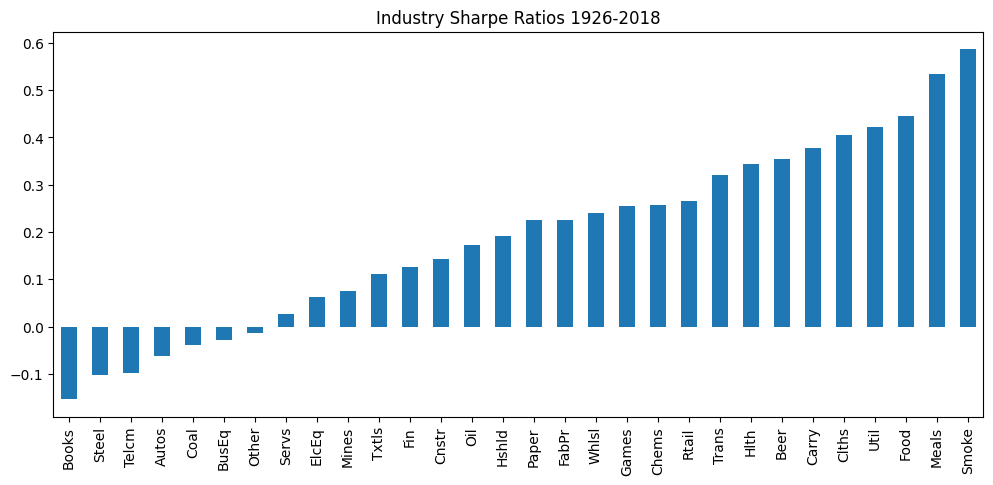

In [18]:
erk.sharpe_ratio(df["2000":], 0.03, 12).sort_values().plot.bar(title = 'Industry Sharpe Ratios 1926-2018', color = 'tab:blue', figsize = (12,5)) # type: ignore

In [19]:
expected_return = erk.annualized_returns(df["1995":"2000"], 12) # type: ignore

<Axes: >

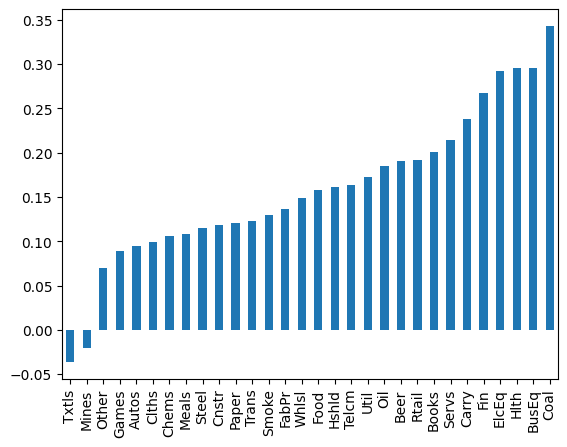

In [20]:
expected_return.sort_values().plot.bar() # type: ignore

In [21]:
cov = df["1995":"2000"].cov()

In [22]:
cov.shape

(30, 30)